In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('abalone.csv')

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df['Age'] = df['Shell weight'] + 1.5  

In [6]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,1.738831
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,0.139203
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,1.501500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,1.630000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,1.734000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,1.829000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,2.505000


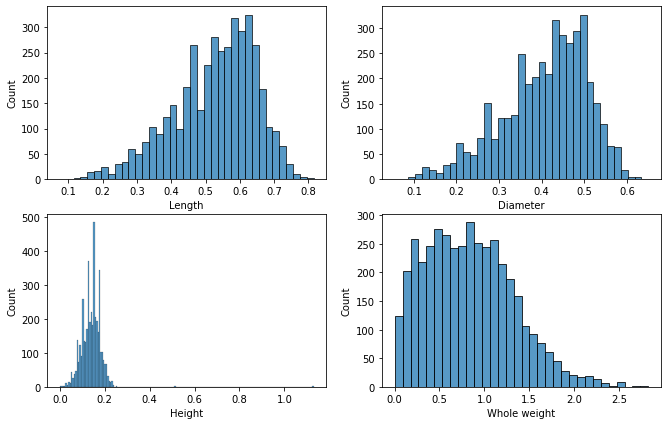

In [10]:
fig = plt.figure(figsize=(11,7))
for ind,col in enumerate(['Length','Diameter','Height','Whole weight']):
  ax = fig.add_subplot(2,2,ind+1)
  sns.histplot(data=df,x=col,ax=ax)


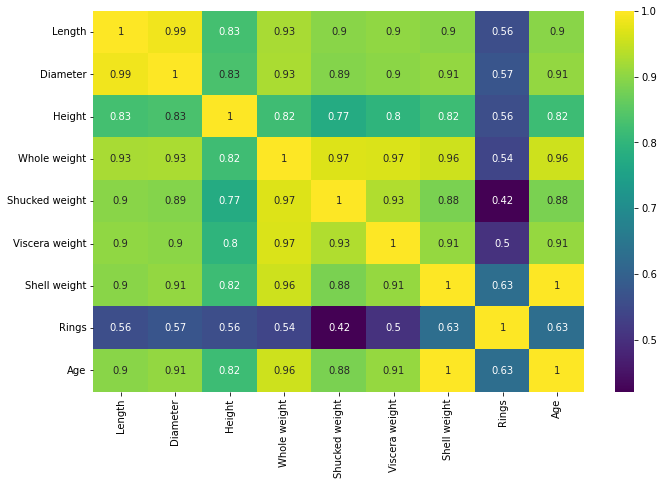

In [11]:
plt.figure(figsize=(11,7))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

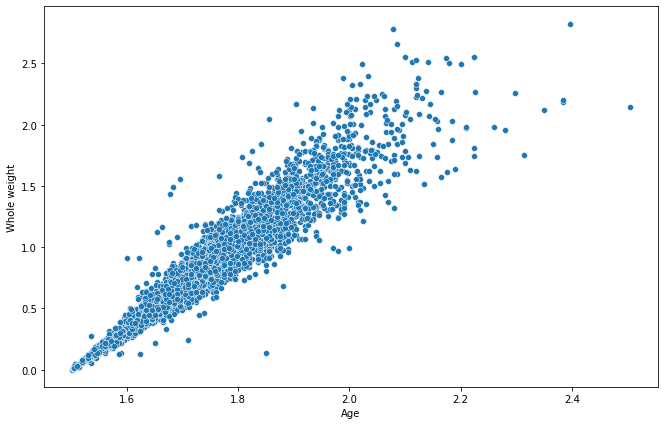

In [12]:
plt.figure(figsize=(11,7))
sns.scatterplot(data=df,x='Age',y='Whole weight')

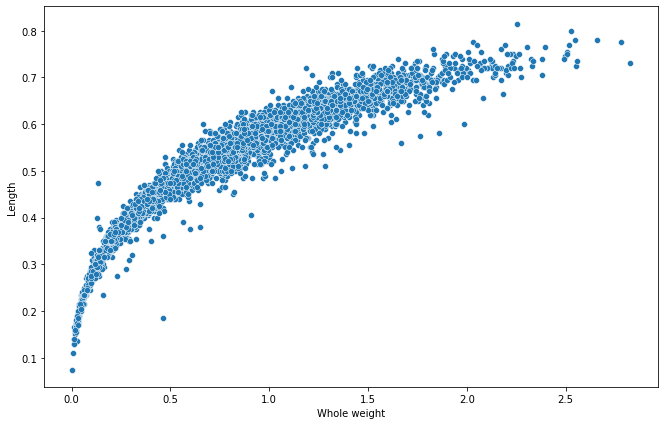

In [13]:
plt.figure(figsize=(11,7))
sns.scatterplot(data=df,x='Whole weight',y='Length')

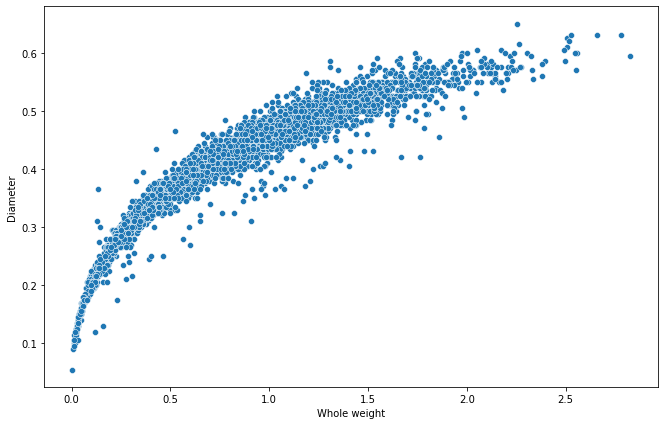

In [15]:
plt.figure(figsize=(11,7))
sns.scatterplot(data=df,x='Whole weight',y='Diameter')

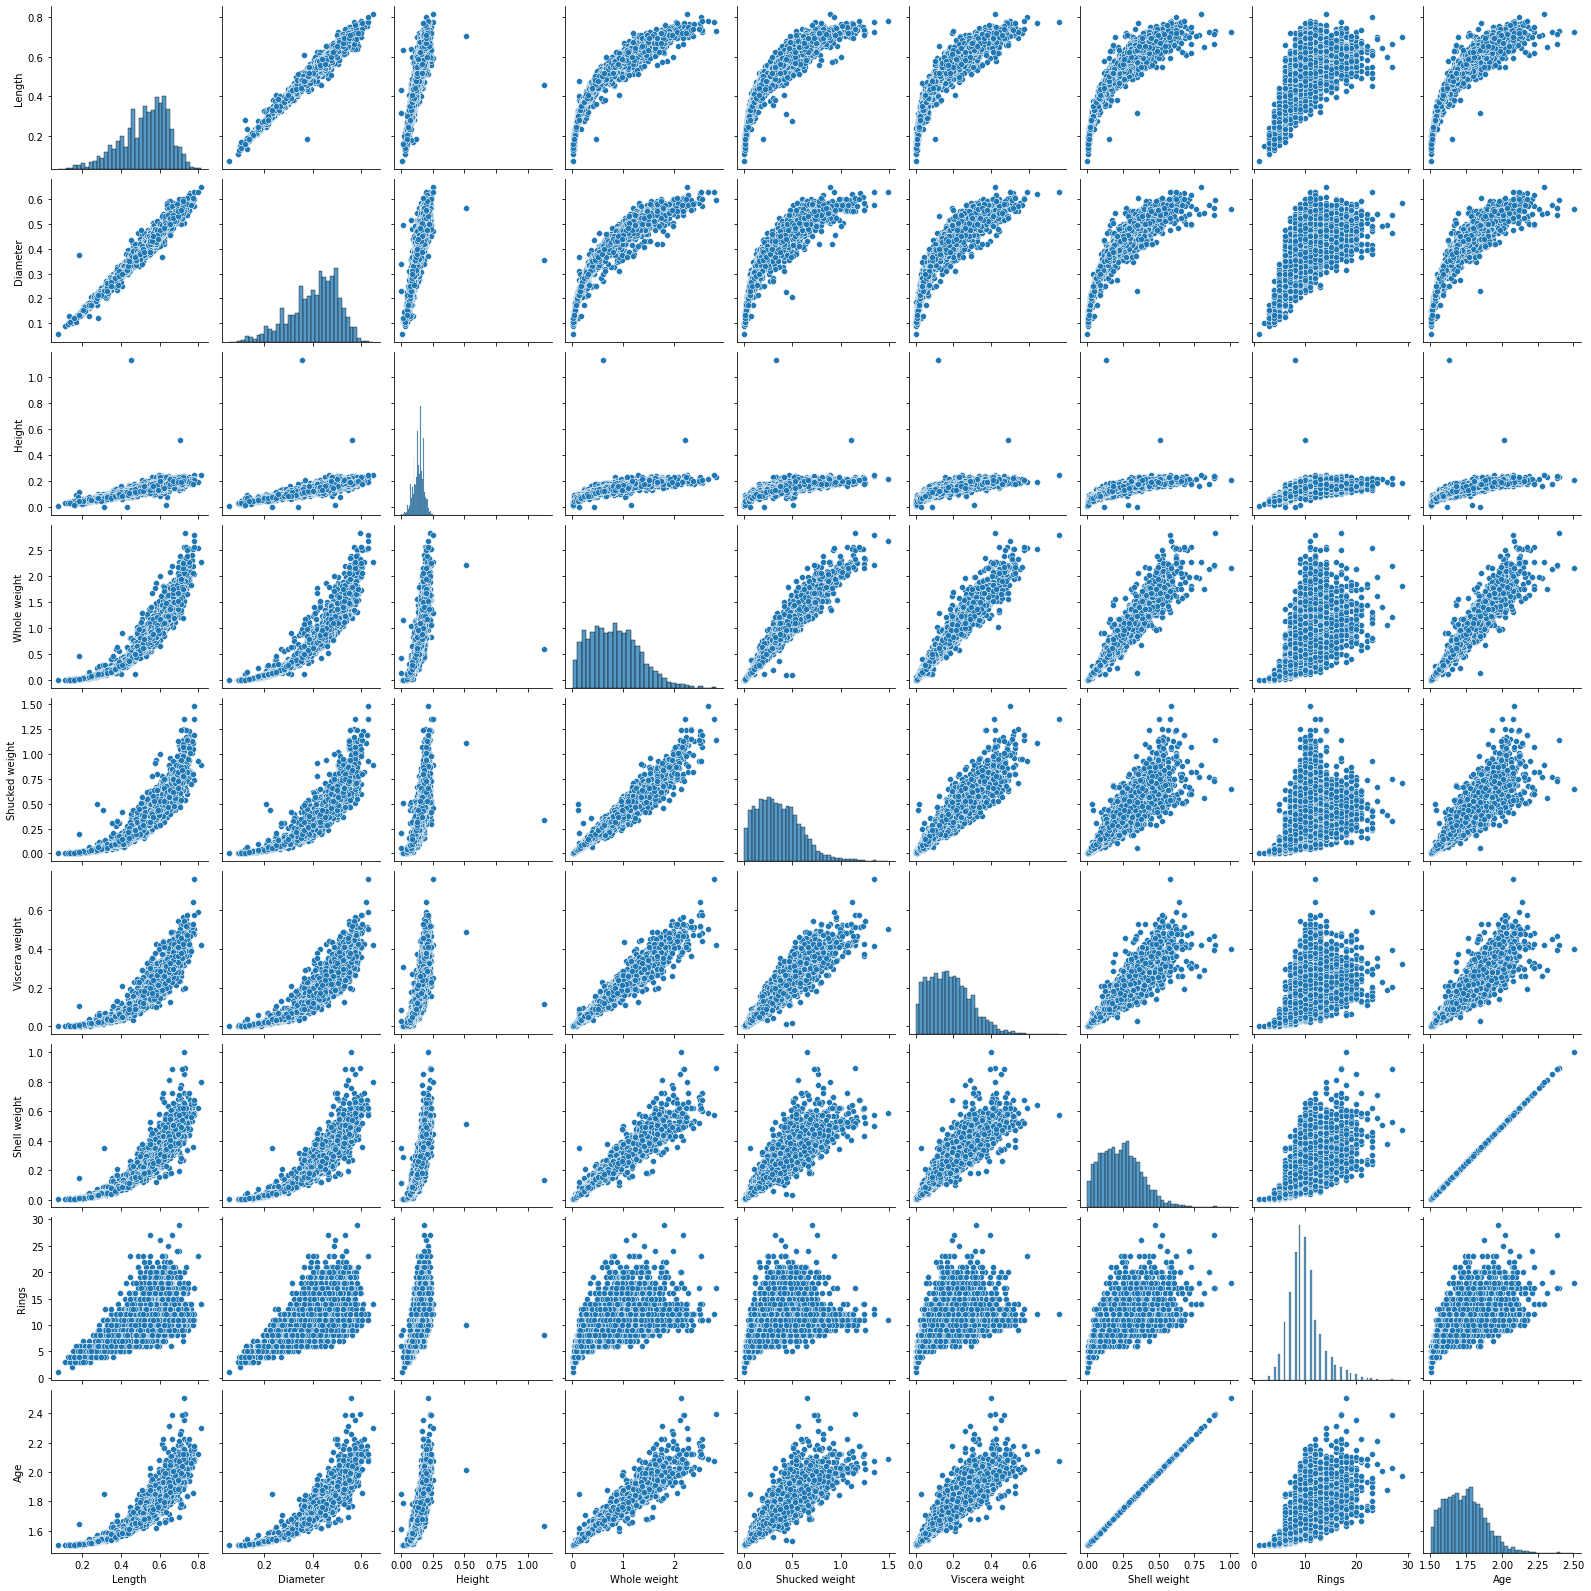

In [16]:
sns.pairplot(data=df)

In [17]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Age               0
dtype: int64

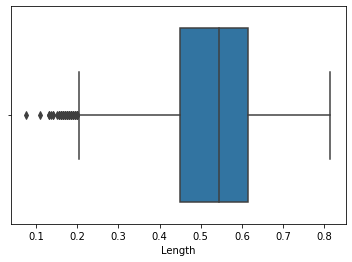

In [18]:
sns.boxplot(data=df,x='Length')

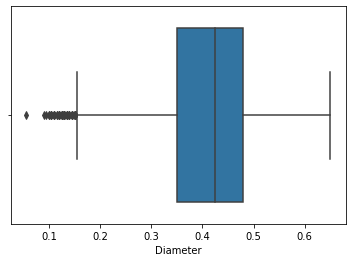

In [19]:
sns.boxplot(data=df,x='Diameter')

In [20]:
df[(df['Diameter']==df['Diameter'].min()) & (df['Length'] < 0.1)]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
236,I,0.075,0.055,0.01,0.002,0.001,0.0005,0.0015,1,1.5015


In [21]:
df = df.drop(index=236)

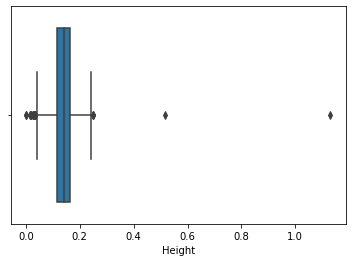

In [22]:
sns.boxplot(data=df,x='Height')

In [23]:
df = df.drop(index=df[df['Height'] > 0.5].index)

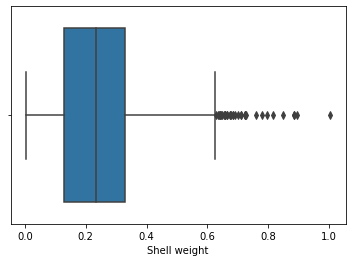

In [24]:
sns.boxplot(data=df,x='Shell weight')

In [25]:
df = df.drop(df[df['Shell weight'] > 0.9].index)

In [26]:
enc_sex = pd.get_dummies(df['Sex'])

In [27]:
df = pd.concat([df.drop('Sex',axis=1),enc_sex],axis=1)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = df.drop('Age',axis=1)
y = df['Age']

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

In [33]:
scaled_x_train = scaler.fit_transform(X_train)

In [34]:
scaled_x_test = scaler.transform(X_test)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
model = LinearRegression()

In [37]:
model.fit(scaled_x_train,y_train)

LinearRegression()

In [38]:
prediction = model.predict(scaled_x_test)

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [40]:
mean_absolute_error(y_test,prediction)

1.863132891899688e-16

In [41]:
df['Age'].mean()

1.7386639108554995

In [42]:
np.sqrt(mean_squared_error(y_test,prediction))

2.419918940304902e-16

In [43]:
df['Age'].std()

0.13864048404815985